In [7]:
library(phyloseq)
library(ggplot2)
library(vegan)
library(readr)
library(data.table)
library(dplyr)
library(stats)
library(ggpubr)
library(dunn.test)

In [8]:
cadaver_5krare = readRDS("/gpfs/data/gilbert-lab/Lutz/Cadaver/All_cohorts/RDSfiles/all_cohorts_cadaver_5krare.rds")


### Alpha Diversity

In [9]:
Ita = subset_samples(cadaver_5krare, Location=="Italy")
Fin = subset_samples(cadaver_5krare, Location=="Finland")
USA = subset_samples(cadaver_5krare, Location=="USA")

Liver = subset_samples(cadaver_5krare, Organ=="Liver")

In [10]:
sample_tab = read.csv("/gpfs/data/gilbert-lab/Lutz/Cadaver/All_cohorts/final_biom/all_cadaver_metadata.csv")
colnames(sample_tab)[1] <- "SampleID"

#### Italy

In [44]:
#By Manner of Death (MOD)

obs = estimate_richness(na.omit(Ita), split = TRUE, measures = "Observed")
obs$SampleID = rownames(obs)

dfobs = merge(obs, sample_tab, on="SampleID")

ordobs = obs %>% group_by("MOD") %>%
    summarize(med.obs = median(Observed)) %>%
    arrange(desc(med.obs)) %>%
    magrittr::extract2("MOD")

stats.obs = dfobs %>%
    group_by(MOD) %>%
    summarize(median = median(Observed), 
              mean = mean(Observed),
              sd = sd(Observed),
              sem = sd(Observed/sqrt(length(Observed)))) #%>%
    #arrange(-desc(mean))
stats.obs

#CHECK FOR SIGNIFICANCE
stats.krusk = kruskal.test(Observed~MOD, data=dfobs)
stats.krusk

#POST-HOC ANALYSIS
dunn = dunn.test(dfobs$Observed, g=dfobs$MOD, method="bonferroni")
dunn

MOD,median,mean,sd,sem
Accident,31.5,46.3,41.197982,9.212149
Homicide,46.0,47.0,4.582576,2.645751
Natural,42.0,51.0,37.096818,7.572356
Suicide,41.0,67.0,56.525805,15.677438



	Kruskal-Wallis rank sum test

data:  Observed by MOD
Kruskal-Wallis chi-squared = 3.4438, df = 3, p-value = 0.3281


  Kruskal-Wallis rank sum test

data: x and group
Kruskal-Wallis chi-squared = 3.4438, df = 3, p-value = 0.33


                           Comparison of x by group                            
                                 (Bonferroni)                                  
Col Mean-|
Row Mean |   Accident   Homicide    Natural
---------+---------------------------------
Homicide |  -1.290442
         |     0.5907
         |
 Natural |  -1.295010   0.664431
         |     0.5859     1.0000
         |
 Suicide |  -1.494464   0.416137  -0.407522
         |     0.4052     1.0000     1.0000

alpha = 0.05
Reject Ho if p <= alpha/2


$chi2
[1] 3.443817

$Z
[1] -1.2904423 -1.2950105  0.6644315 -1.4944648  0.4161376 -0.4075229

$P
[1] 0.09844857 0.09765831 0.25320710 0.06752709 0.33865464 0.34181199

$P.adjusted
[1] 0.5906914 0.5859499 1.0000000 0.4051626 1.0000000 1.0000000

$comparisons
[1] "Accident - Homicide" "Accident - Natural"  "Homicide - Natural" 
[4] "Accident - Suicide"  "Homicide - Suicide"  "Natural - Suicide"

In [45]:
#Sort by Obs

avg <- aggregate(Observed ~ MOD, data = dfobs, mean)
dfobs$MOD <-factor(dfobs$MOD, levels=avg[order(avg$Observed), "MOD"])

png 
  2

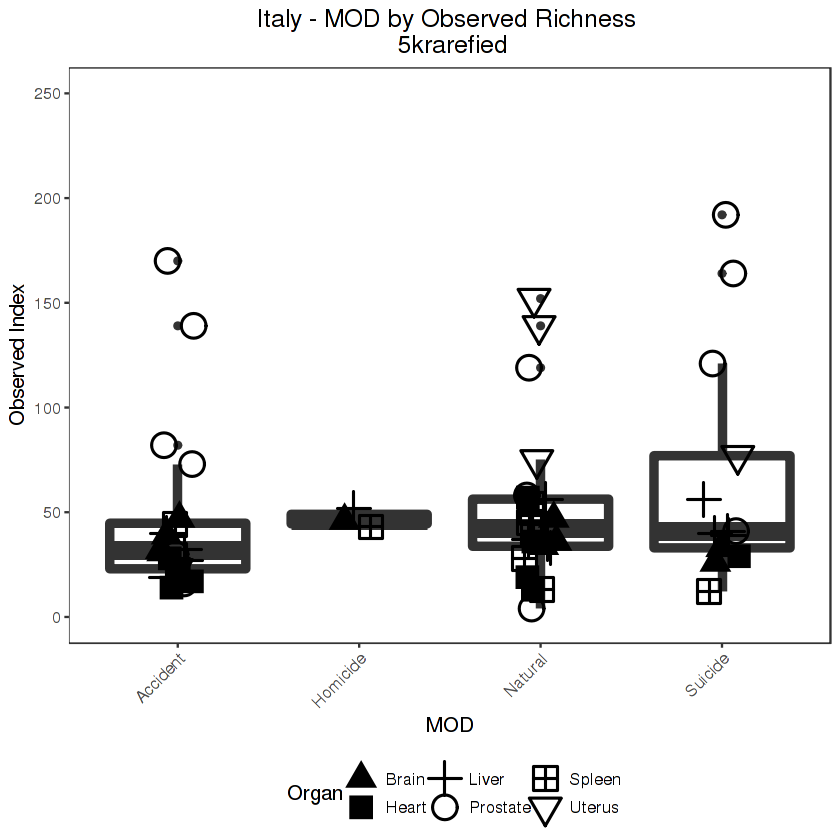

In [58]:
p = ggplot(na.omit(dfobs), aes(x = MOD, y = Observed)) + ggtitle("Italy - MOD by Observed Richness \n 5krarefied")

p = p + geom_boxplot(lwd=2) + ylab("Observed Index") + ylim(0,250)

p = p + geom_point(size = 6,alpha=1,stroke=1,
                   position = position_jitter(h = 0, w = 0.1), aes(shape=Organ)) +
                   scale_shape_manual(values=c(17,15,3,1,12,6))

p = p + theme_bw() + theme(text=element_text(size=12, color="black",family="Times New Roman"),
                           legend.key = element_blank(),
                           axis.text.x = element_text(angle = 45, hjust = 1),
                           plot.title = element_text(hjust = 0.5),
                           legend.position = "bottom",
                           #axis.title.y=element_blank(),
                           panel.grid.major = element_blank(),
                           panel.grid.minor = element_blank())

p

png('Italy_MOD_observed.png', width=10, height=10, units='in', res=300)
plot(p)
dev.off()

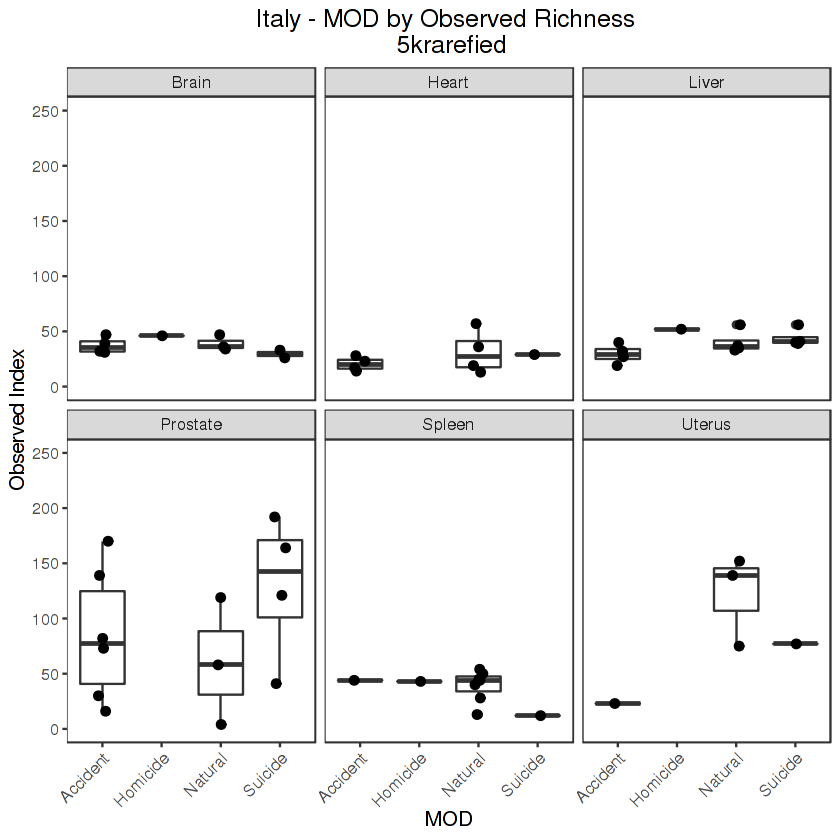

In [15]:
#Facet wrap by organ

p = ggplot(na.omit(dfobs), aes(x = MOD, y = Observed)) + ggtitle("Italy - MOD by Observed Richness \n 5krarefied")

p = p + geom_boxplot() + ylab("Observed Index") + ylim(0,250)

p = p + geom_point(size = 2,alpha=1,
                   position = position_jitter(h = 0, w = 0.1))

p = p + theme_bw() + theme(text=element_text(size=12, color="black",family="Times New Roman"),
                           legend.key = element_blank(),
                           axis.text.x = element_text(angle = 45, hjust = 1),
                           plot.title = element_text(hjust = 0.5),
                           legend.position = "bottom",
                           #axis.title.y=element_blank(),
                           panel.grid.major = element_blank(),
                           panel.grid.minor = element_blank())

p = p + facet_wrap(~Organ)

p

#### USA

In [59]:
#By MOD

#obs.usa = estimate_richness(na.omit(USA), split = TRUE, measures = "Observed") #Write out to remove X's
obs.usa = read.csv("/gpfs/data/gilbert-lab/Lutz/Cadaver/All_cohorts/update_march2019/temp_files/obs.usa.csv")
#obs.usa$SampleID = rownames(obs.usa)

dfobs = merge(obs.usa, sample_tab, on="SampleID")

ordobs = obs %>% group_by("MOD") %>%
    summarize(med.obs = median(Observed)) %>%
    arrange(desc(med.obs)) %>%
    magrittr::extract2("MOD")

stats.obs = dfobs %>%
    group_by(MOD) %>%
    summarize(median = median(Observed), 
              mean = mean(Observed),
              sd = sd(Observed),
              sem = sd(Observed/sqrt(length(Observed)))) #%>%
    #arrange(-desc(mean))
stats.obs

#CHECK FOR SIGNIFICANCE
stats.krusk = kruskal.test(Observed~MOD, data=dfobs)
stats.krusk

#POST-HOC ANALYSIS
dunn = dunn.test(dfobs$Observed, g=dfobs$MOD, method="bonferroni")
dunn

MOD,median,mean,sd,sem
Accident,41.0,56.45161,56.12001,10.079452
Homicide,106.0,104.44444,54.23355,18.077849
Natural,42.0,50.86207,33.38169,6.198825
Suicide,106.5,115.00000,35.98990,10.389389
NA,174.5,174.50000,58.68986,41.500000



	Kruskal-Wallis rank sum test

data:  Observed by MOD
Kruskal-Wallis chi-squared = 22.58, df = 3, p-value = 4.939e-05


  Kruskal-Wallis rank sum test

data: x and group
Kruskal-Wallis chi-squared = 22.5805, df = 3, p-value = 0


                           Comparison of x by group                            
                                 (Bonferroni)                                  
Col Mean-|
Row Mean |   Accident   Homicide    Natural
---------+---------------------------------
Homicide |  -2.753747
         |    0.0177*
         |
 Natural |  -0.183762   2.608210
         |     1.0000     0.0273
         |
 Suicide |  -3.950721  -0.681499  -3.774934
         |    0.0002*     1.0000    0.0005*

alpha = 0.05
Reject Ho if p <= alpha/2


$chi2
[1] 22.58046

$Z
[1] -2.7537477 -0.1837622  2.6082107 -3.9507217 -0.6814994 -3.7749348

$P
[1] 2.945859e-03 4.271000e-01 4.550846e-03 3.895795e-05 2.477778e-01
[6] 8.002474e-05

$P.adjusted
[1] 0.0176751513 1.0000000000 0.0273050760 0.0002337477 1.0000000000
[6] 0.0004801485

$comparisons
[1] "Accident - Homicide" "Accident - Natural"  "Homicide - Natural" 
[4] "Accident - Suicide"  "Homicide - Suicide"  "Natural - Suicide"

In [60]:
#Sort by Observed Richness

avg <- aggregate(Observed ~ MOD, data = dfobs, mean)
dfobs$MOD <-factor(dfobs$MOD, levels=avg[order(avg$Observed), "MOD"])

png 
  2

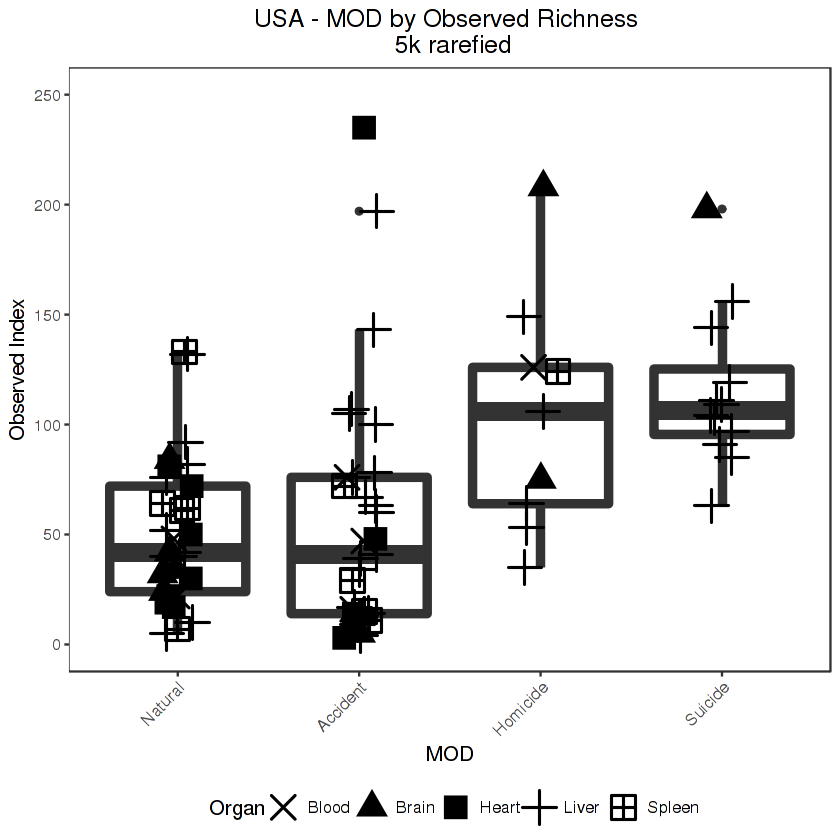

In [61]:
p = ggplot(na.omit(dfobs), aes(x = MOD, y = Observed), shape="Organ") + ggtitle("USA - MOD by Observed Richness \n 5k rarefied")


p = p + geom_boxplot(lwd=2) + ylab("Observed Index") + ylim(0,250)

p = p + geom_point(size = 6,alpha=1,stroke=1,
                   position = position_jitter(h = 0, w = 0.1), aes(shape=Organ)) +
                   scale_shape_manual(values=c(4,17,15,3,12))


p = p + theme_bw() + theme(text=element_text(size=12, color="black",family="Times New Roman"),
                           legend.key = element_blank(),
                           axis.text.x = element_text(angle = 45, hjust = 1),
                           plot.title = element_text(hjust = 0.5),
                           legend.position = "bottom",
                           #axis.title.y=element_blank(),
                           panel.grid.major = element_blank(),
                           panel.grid.minor = element_blank())

p

png('USA_MOD_observed.png', width=10, height=10, units='in', res=300)
plot(p)
dev.off()

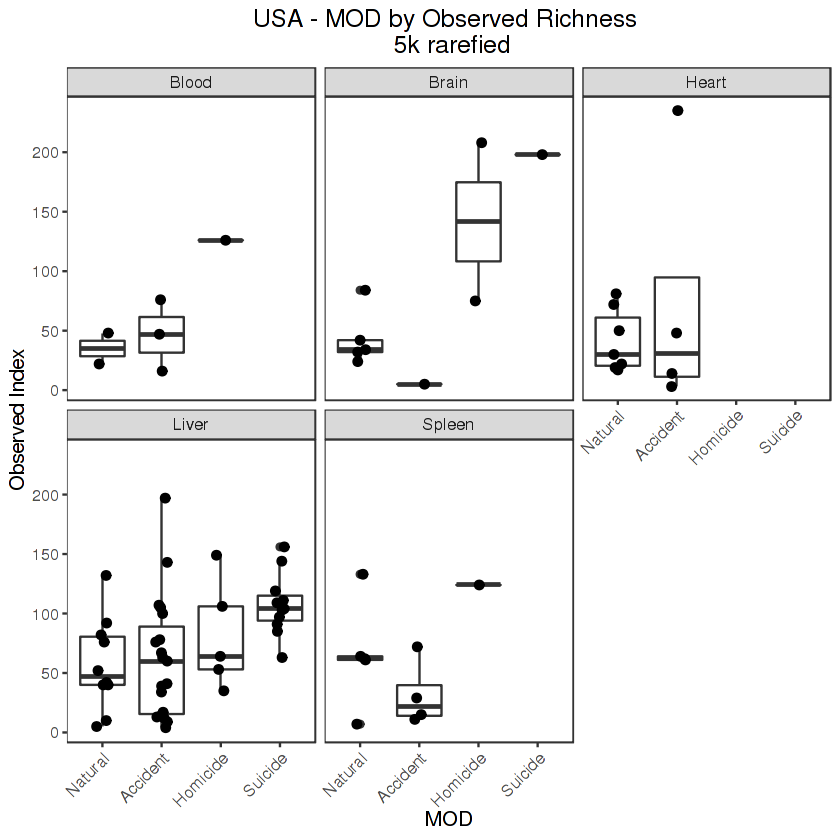

In [31]:
#Facet wrap by organ

p = ggplot(na.omit(dfobs), aes(x = MOD, y = Observed)) + ggtitle("USA - MOD by Observed Richness \n 5k rarefied")

p = p + geom_boxplot() + ylab("Observed Index")

p = p + geom_point(fill = "Black", size = 2,alpha=1,
                   position = position_jitter(h = 0, w = 0.1)) 

p = p + theme_bw() + theme(text=element_text(size=12, color="black",family="Times New Roman"),
                           legend.key = element_blank(),
                           axis.text.x = element_text(angle = 45, hjust = 1),
                           plot.title = element_text(hjust = 0.5),
                           legend.position = "bottom",
                           #axis.title.y=element_blank(),
                           panel.grid.major = element_blank(),
                           panel.grid.minor = element_blank())

p = p + facet_wrap(~Organ)

p

### Liver only to compare with Finland (for which only liver was sampled)

In [62]:
#Liver only, all three MODs (Finland, Italy, USA)

#obs = estimate_richness(na.omit(Liver), split = TRUE, measures = "Observed")
#obs$SampleID = rownames(obs)
obs = read.csv("/gpfs/data/gilbert-lab/Lutz/Cadaver/All_cohorts/update_march2019/temp_files/obs.fin.csv")

dfobs = merge(obs, sample_tab, on="SampleID")

ordobs = obs %>% group_by("MOD") %>%
    summarize(med.obs = median(Observed)) %>%
    arrange(desc(med.obs)) %>%
    magrittr::extract2("MOD")

stats.obs = dfobs %>%
    group_by(MOD, Location) %>%
    summarize(median = median(Observed), 
              mean = mean(Observed),
              sd = sd(Observed),
              sem = sd(Observed/sqrt(length(Observed)))) #%>%
    #arrange(-desc(mean))
stats.obs

#CHECK FOR SIGNIFICANCE
stats.krusk = kruskal.test(Observed~MOD, data=dfobs)
stats.krusk

#POST-HOC ANALYSIS
dunn = dunn.test(dfobs$Observed, g=dfobs$MOD, method="bonferroni")
dunn

MOD,Location,median,mean,sd,sem
Accident,Finland,13,13.33333,8.914408,3.639292
Natural,Finland,9,9.75000,5.011351,1.446652
Suicide,Finland,5,5.00000,0.000000,0.000000



	Kruskal-Wallis rank sum test

data:  Observed by MOD
Kruskal-Wallis chi-squared = 1.7003, df = 2, p-value = 0.4274


  Kruskal-Wallis rank sum test

data: x and group
Kruskal-Wallis chi-squared = 1.7003, df = 2, p-value = 0.43


                           Comparison of x by group                            
                                 (Bonferroni)                                  
Col Mean-|
Row Mean |   Accident    Natural
---------+----------------------
 Natural |   0.636262
         |     0.7869
         |
 Suicide |   1.298764   0.971906
         |     0.2910     0.4966

alpha = 0.05
Reject Ho if p <= alpha/2


$chi2
[1] 1.700284

$Z
[1] 0.6362622 1.2987647 0.9719065

$P
[1] 0.26230278 0.09701234 0.16554853

$P.adjusted
[1] 0.7869083 0.2910370 0.4966456

$comparisons
[1] "Accident - Natural" "Accident - Suicide" "Natural - Suicide"

In [63]:
#Sort by Observed Richness

avg <- aggregate(Observed ~ MOD, data = dfobs, median)
dfobs$MOD <-factor(dfobs$MOD, levels=avg[order(avg$Observed), "MOD"])

png 
  2

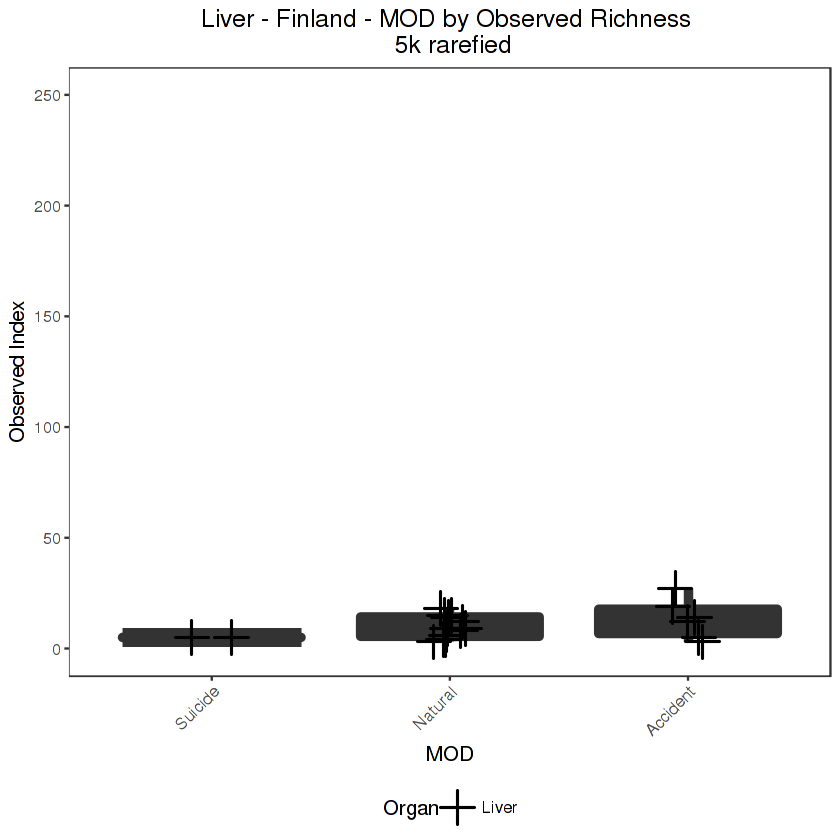

In [65]:
p = ggplot(na.omit(dfobs), aes(x = MOD, y = Observed)) + ggtitle("Liver - Finland - MOD by Observed Richness \n 5k rarefied")

p = p + geom_boxplot(lwd=2) + ylab("Observed Index") + ylim(0,250)

p = p + geom_point(size = 6,alpha=1,stroke=1,
                   position = position_jitter(h = 0, w = 0.1), aes(shape=Organ)) +
                   scale_shape_manual(values=c(3))
                                                
p = p + theme_bw() + theme(text=element_text(size=12, color="black",family="Times New Roman"),
                           legend.key = element_blank(),
                           axis.text.x = element_text(angle = 45, hjust = 1),
                           plot.title = element_text(hjust = 0.5),
                           legend.position = "bottom",
                           #axis.title.y=element_blank(),
                           panel.grid.major = element_blank(),
                           panel.grid.minor = element_blank())

p

png('Finland_MOD_observed.png', width=7.5, height=10, units='in', res=300)
plot(p)
dev.off()